**Analyzing the beer consumption per country.**

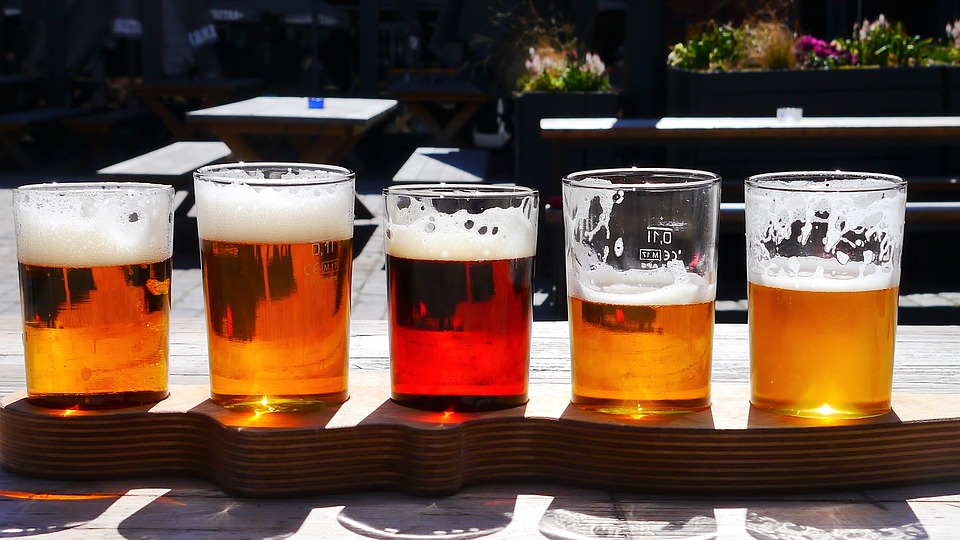


In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [2]:
# read the data

df = pd.read_csv('drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [3]:
# extract the column 'beer_drinks', set the 'country' column as index, and transform from dataframe into series.

df_beer = pd.read_csv('drinks.csv', usecols=['country', 'beer_servings'], index_col='country', squeeze=True)
df_beer

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
               ...  
Venezuela      333.0
Vietnam        111.0
Yemen            6.0
Zambia          32.0
Zimbabwe        64.0
Name: beer_servings, Length: 193, dtype: float64

In [4]:
type(df_beer)

pandas.core.series.Series

In [5]:
# number of elements in series with NA values

df_beer.size

193

In [6]:
# number of elements in series without NA values

df_beer.count()

178

In [7]:
# list of countries where doesn't exist informations about beer consumption

list(df_beer[df_beer.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Cook Islands',
 'North Korea',
 'Iran',
 'Kuwait',
 'Libya',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Pakistan',
 'San Marino',
 'Saudi Arabia',
 'Somalia']

In [8]:
# sum of coutries without beer consumption

df_beer.isnull().sum()

15

In [9]:
# total beer consumed by countries that consumed less than 100 per servings

df_beer[df_beer < 100].sum()

3889.0

In [10]:
# calculate the average 

beer_average = df_beer.mean()
beer_average

102.87078651685393

In [11]:
# calculate the median

beer_median = df_beer.median()
beer_median

60.0

In [12]:
# calculate the min and max of beer servings

max_beer_servings = df_beer.max()
min_beer_servings = df_beer.min()

print(f'The max of beer servings is {max_beer_servings} and the min is {min_beer_servings}.')

The max of beer servings is 376.0 and the min is 1.0.


In [13]:
# calculate standard deviation

df_beer.std()

100.64571267934778

In [14]:
# calculate variance

df_beer.var()

10129.559480733828

In [15]:
# another method to calculate average, variance, standard deviation

df_beer.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

In [16]:
# customize percentage

df_beer.describe(percentiles=(0.45,0.65, 0.95))

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
45%       51.000000
50%       60.000000
65%      124.150000
95%      295.300000
max      376.000000
Name: beer_servings, dtype: float64

In [17]:
# finding the most common value

df_beer.mode()

0    5.0
1    6.0
2    9.0
dtype: float64

In [18]:
# calculate the number of occurrences for each value

df_beer.value_counts()

6.0      5
5.0      5
9.0      5
36.0     4
21.0     4
        ..
3.0      1
188.0    1
169.0    1
22.0     1
89.0     1
Name: beer_servings, Length: 116, dtype: int64

In [19]:
# find the country who consumed the most beer

df_beer.idxmax()

'Namibia'

In [20]:
# find the country who consumed the least beer 
# it's returning only the first country in alphabetic order

df_beer.idxmin()

'Comoros'

In [21]:
# find all the country who consumed the least beer

df_beer[df_beer == df_beer.min()]

country
Comoros        1.0
Haiti          1.0
Qatar          1.0
Timor-Leste    1.0
Name: beer_servings, dtype: float64

In [22]:
# top 10 largest beer consuming countries

df_beer.nlargest(10)

country
Namibia           376.0
Czech Republic    361.0
Gabon             347.0
Germany           346.0
Lithuania         343.0
Poland            343.0
Venezuela         333.0
Ireland           313.0
Romania           297.0
Belgium           295.0
Name: beer_servings, dtype: float64

In [23]:
# top 10 smallest beer consuming countries

df_beer.nsmallest(10)

country
Comoros        1.0
Haiti          1.0
Qatar          1.0
Timor-Leste    1.0
Ethiopia       2.0
Lebanon        2.0
Tajikistan     2.0
Niger          3.0
Indonesia      5.0
Mali           5.0
Name: beer_servings, dtype: float64

In [24]:
# select all the countries that have more than 50 beer servings 

fifty_plus = df_beer[df_beer > 50]
fifty_plus

country
Albania       89.0
Andorra      245.0
Angola       217.0
Argentina    193.0
Australia    261.0
             ...  
USA          249.0
Uruguay      115.0
Venezuela    333.0
Vietnam      111.0
Zimbabwe      64.0
Name: beer_servings, Length: 99, dtype: float64

In [25]:
# choose the countries with the smallest 20 beer servings values from fifty_plus

fifty_plus.nsmallest(20)

country
Tunisia                51.0
Turkey                 51.0
Dominica               52.0
El Salvador            52.0
Georgia                52.0
Guatemala              53.0
Sao Tome & Principe    56.0
Solomon Islands        56.0
Cambodia               57.0
Kenya                  58.0
Laos                   62.0
Micronesia             62.0
Israel                 63.0
Zimbabwe               64.0
Honduras               69.0
Philippines            71.0
Bosnia-Herzegovina     76.0
Congo                  76.0
Fiji                   77.0
Japan                  77.0
Name: beer_servings, dtype: float64

In [26]:
fifty_plus.nsmallest(20).describe()

count    20.000000
mean     61.750000
std       9.491686
min      51.000000
25%      52.750000
50%      60.000000
75%      69.500000
max      77.000000
Name: beer_servings, dtype: float64

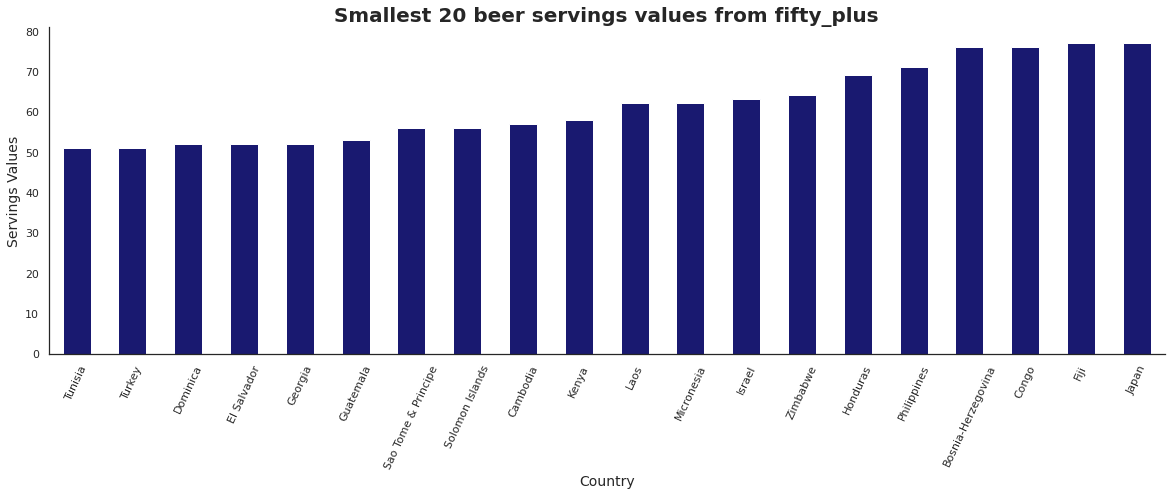

In [27]:
sns.set_style('white')
plt.figure(figsize=(20,6))
fifty_plus.nsmallest(20).plot.bar(rot =65,
                                  color= 'midnightblue')
plt.title('Smallest 20 beer servings values from fifty_plus', fontsize = 20, fontweight='bold')
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Servings Values', fontsize = 14)

sns.despine()                                 
plt.show()

In [112]:
# create a bar plot with total drinks servings over the world

total_drinks = df.loc[:,['beer_servings', 'wine_servings','spirit_servings']].rename(columns ={'beer_servings': 'Beer',
                                                                                    'wine_servings':'Wine',
                                                                                    'spirit_servings':'Spirit'}).sum().squeeze()
total_drinks

Beer      18311.0
Wine       8221.0
Spirit    13742.0
dtype: float64

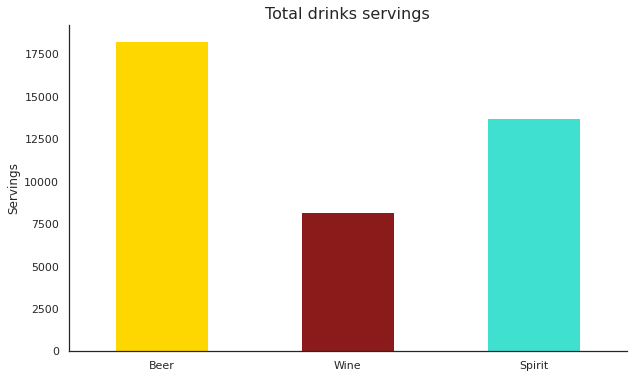

In [115]:
sns.set_style(style = 'white')
plt.figure(figsize=(10,6))
total_drinks.plot.bar(rot = 360, color = ['#FFD700','#8B1A1A','#40E0D0'])
plt.title('Total drinks servings', fontsize = 16)
plt.ylabel('Servings')
sns.despine()
plt.show()
